# DSA
## Fundamentos de Linguagem Python Para Data Science
### Introdução ao Deep Learning


Problema de Negócio:

Construir um modelo de Intelência Artificial capaz de classificar imagens considerando 10 categorias: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']. o modelo deve ser capaz de classificar e indicar o que é a imagem.


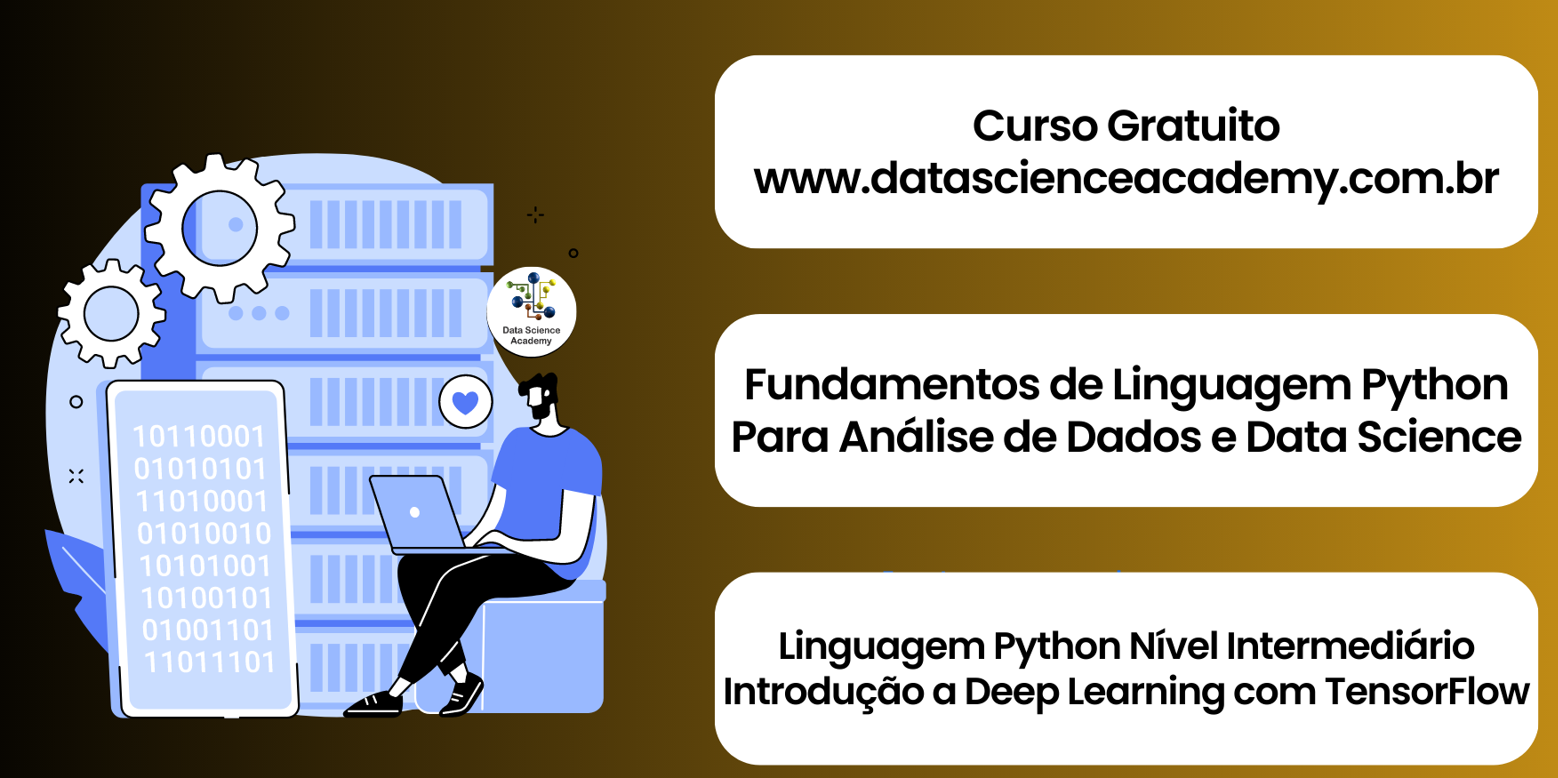

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


 https://www.tensorflow.org/
 
 ### ATENÇÃO:
o TensorFlow pode apresentar problemas em algumas versões de sistema operacional. Verifique a documentação oficial no link acima.

In [2]:
# Instala o TF
# !pip install -q tensorflow==2.12

In [3]:
# Silencia mensagens do TF
%env TF_CPP_MIN_LOG_LEVEL=3

env: TF_CPP_MIN_LOG_LEVEL=3


In [4]:
# Imports
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

### Carregando os Dados

https://www.cs.toronto.edu/~kriz/cifar.html

In [5]:
# Carrega o dataset CIFAR-10
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.cifar10.load_data()

In [6]:
# Classes das imagens
nomes_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### Pré-Processamento e Visualização das Imagens

In [7]:
# Normalmente os valores dos pixel para que os dados fiquem na mesma escala
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0 

In [8]:
# Função para exibir as imagens
def visualiza_imagens(images, labels):
    plt.figure(figsize = (10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
        plt.xlabel(nomes_classes[labels[i][0]])
    plt.show()

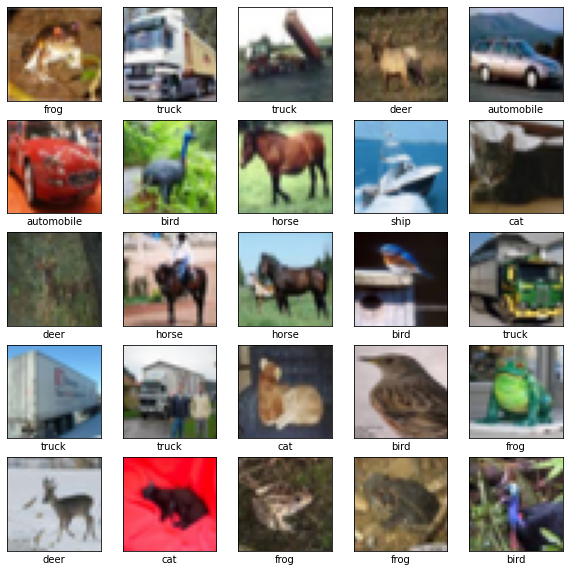

In [9]:
# Executa a função
visualiza_imagens(imagens_treino, labels_treino)

### Construção do Modelo
Construção de modelos é estudada nas Formações: Formação Cientista de Dados e Formação Engenheiro de IA. www.deepleanrningbook.com.br

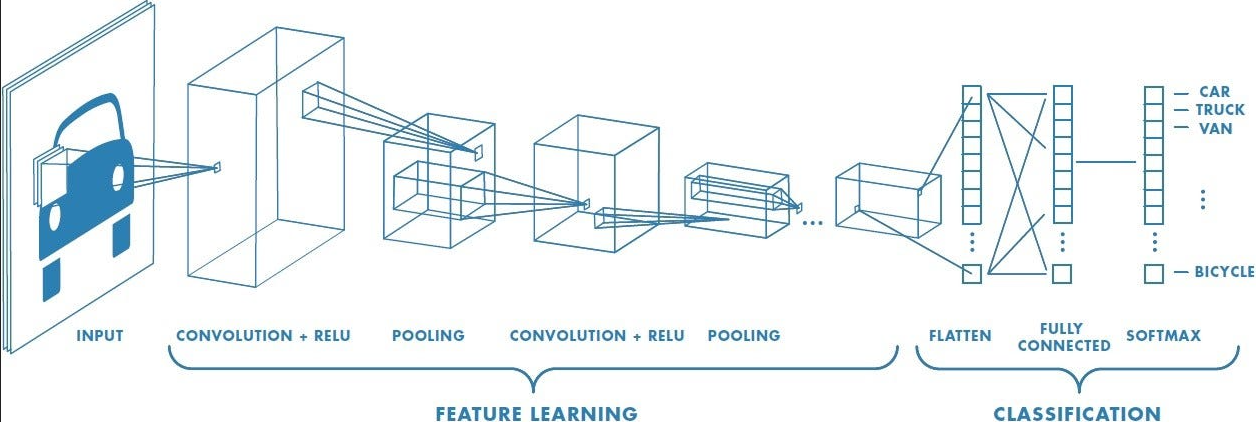

In [12]:
# Modelo 

# Cria o objeto de sequência de camadas
modelo_dsa = models.Sequential()

# Adiciona o primeiro bloco de convolução e max pooling (camada de entrada)
modelo_dsa.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
modelo_dsa.add(layers.MaxPooling2D((2, 2)))

# Adiciona o segundo bloco de convolução e max pooling (camada intermediária)
modelo_dsa.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelo_dsa.add(layers.MaxPooling2D((2, 2)))
               
# Adiciona o terceiro bloco de convolução e max pooling (camada intermediária)
modelo_dsa.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelo_dsa.add(layers.MaxPooling2D((2, 2)))


In [13]:
# Adicionar camadas de classificação
modelo_dsa.add(layers.Flatten())
modelo_dsa.add(layers.Dense(64, activation = 'relu'))
modelo_dsa.add(layers.Dense(10, activation = 'softmax'))

In [14]:
# Sumário do modelo
modelo_dsa.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [16]:
# Compilação do modelo
modelo_dsa.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

In [17]:
%%time
history = modelo_dsa.fit(imagens_treino,
                        labels_treino,
                        epochs = 100,
                        validation_data = (imagens_teste, labels_teste))

Epoch 1/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.5745 - accuracy: 0.4264 - val_loss: 1.3216 - val_accuracy: 0.5223
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1940 - accuracy: 0.5775 - val_loss: 1.1192 - val_accuracy: 0.6025
Epoch 3/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.0486 - accuracy: 0.6307 - val_loss: 1.0510 - val_accuracy: 0.6312
Epoch 4/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9514 - accuracy: 0.6662 - val_loss: 0.9702 - val_accuracy: 0.6576
Epoch 5/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8700 - accuracy: 0.6964 - val_loss: 0.9147 - val_accuracy: 0.6839
Epoch 6/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8138 - accuracy: 0.7162 - val_loss: 0.9217 - val_accuracy: 0.6875
Epoch 7/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7654 - accuracy: 0.7341 - val_loss: 0.8725 -

### Avaliação do Modelo


In [18]:
# Avalia o modelo
erro_teste, acc_teste = modelo_dsa.evaluate(imagens_teste, labels_teste, verbose = 2)

313/313 - 3s - loss: 0.8515 - accuracy: 0.7124 - 3s/epoch - 9ms/step


In [19]:
print('\Acurácia com Data de Teste:' , acc_teste)

\Acurácia com Data de Teste: 0.7124000191688538


### Deploy do Modelo

Deploy do modelo é estudado especialmente na Formação Engenheiro de Machine Learning.

In [22]:
# Carrega uma nova imagem
nova_imagem = Image.open('dados/nova_imagem.jpg')

In [23]:
# Dimensões da imagem (em pixels)
nova_imagem.size

(1919, 1199)

In [24]:
# Obter largura e altura da imagem
largura = nova_imagem.width
altura = nova_imagem.height

In [25]:
print('A largura da imagem é: ', largura)
print('A altura da imagem é: ', altura)

A largura da imagem é:  1919
A altura da imagem é:  1199


In [31]:
# Redimensiona para 32x32 pixels
nova_imagem = nova_imagem.resize((32, 32))

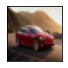

In [32]:
# Exibir a imagem
plt.figure(figsize = (1, 1))
plt.imshow(nova_imagem)
plt.xticks([])
plt.yticks([])
plt.show()

In [33]:
# Converte a imagem para um array NumPy e normaliza
nova_imagem_array = np.array(nova_imagem) / 255.0

In [34]:
# Expande a dimensão do array para que ele tenha o formato (1, 32, 32, 3)
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0)

In [35]:
# Previsões
previsoes = modelo_dsa.predict(nova_imagem_array)

1/1 [==============================] - 0s 81ms/step


In [36]:
print(previsoes)

[[4.9020605e-06 9.9847716e-01 1.1291616e-07 1.2297798e-07 1.7495561e-08
  3.1216962e-07 1.9976635e-06 7.0548376e-09 6.3437742e-06 1.5089788e-03]]


In [37]:
# Obtém a classe com maior probabilidade e o nome da classe
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = nomes_classes[classe_prevista]

In [38]:
print('A Nova imagem foi classificada como:', nome_classe_prevista)

A Nova imagem foi classificada como: automobile


# FIM
## Thanks a Looot !!!!
### Visite o blog da DSA !!!
####   ;)